<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

# TS1: Síntesis de señales
**Alumna:** Agustina Rocío Paolini Rosso  
**Carrera:** Ingeniería Biomédica  
**Materia:** Análisis y Procesamiento de Señales  
**Fecha:** Agosto 2025  

## Consigna
1. Sintetizar y graficar:
   - Una señal sinusoidal de 2 kHz.  
   - La misma señal amplificada y desfasada en π/2.  
   - La misma señal modulada en amplitud por otra sinusoidal de la mitad de la frecuencia.  
   - La señal anterior recortada al 75% de su potencia.  
   - Una señal cuadrada de 4 kHz.  
   - Un pulso rectangular de 10 ms.  

   En cada caso indicar: tiempo entre muestras, número de muestras y energía/potencia.  

2. Verificar la ortogonalidad entre la primera señal y las demás.  

3. Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.  

4. Demostrar la igualdad trigonométrica:
   $$
   2 \cdot \sin(\alpha)\cdot \sin(\beta) = \cos(\alpha-\beta)-\cos(\alpha+\beta) \tag{1}
   $$
   Mostrando que se cumple con señales sinusoidales para $(\alpha = \omega t)$ y $(\beta = \frac{\omega}{2}t)$.  

5. *Bonus*:  
   - Graficar la temperatura del procesador de la computadora en tiempo real, considerando la distancia entre muestras y el tiempo de cada muestra.  
   - Descargar un archivo `.wav` desde freesound.org, graficarlo y calcular su energía.  

## Resolución

En el presente trabajo se busca comprender cómo se generan, representan y analizan distintas señales en un entorno digital. El estudio y la síntesis de estas mismas permite comprender cómo se representan, procesan y analizan las formas de onda en sistemas reales.  

Al discretizar una señal continua se emplea una frecuencia de muestreo $f_s$, la cual determina el tiempo entre muestras $t_s = 1/f_s$ y la cantidad de datos que describen la señal. 

A partir de estas señales se calculan propiedades fundamentales, como la energía, si se trata de una señal de duración finita o no periódica, mediante:  
$$
E = \sum_{n=0}^{N-1} |x[n]|^2 \cdot T_s \tag{2}
$$
midiendo, así, la "cantidad de señal" contenida en un intervalo finito. A lo largo de este informe, para las señales generadas siempre se calculó la energía de las mismas, dado que son finitas al tomar un intervalo de tiempo determinado. 

Y la potencia, si se trabaja con señales periódicas o infinitas en el tiempo, empleando:  
$$
P = \frac{E}{N \cdot T_s} = \frac{1}{N}\sum_{n=0}^{N-1} |x[n]|^2 \tag{3}
$$
que mide el promedio de energía por unidad de tiempo de la señal.  

Asimismo, se estudia la ortogonalidad entre ellas, considerando que dos señales, $x(t)$ e $y(t)$, son ortogonales en un intervalo si su producto interno es cero:  
$$
\langle x, y \rangle = \int x(t)\,y(t)\,dt = 0
$$ 

En el caso discreto, se aproxima por:  
$$
\langle x, y \rangle \approx \sum x[n]\cdot y[n]\cdot t_s \tag{4}
$$

A su vez, se aplican conceptos de correlación y autocorrelación para analizar la similitud de una señal consigo misma o con otra en el tiempo. También se incluyen ejercicios de verificación de identidades trigonométricas con señales sinusoidales, lo cual permite conectar la teoría matemática con la práctica de síntesis de señales.

Además de trabajar con señales sintetizadas, este trabajo incluye la adquisición y análisis de una magnitud física real: la temperatura del procesador de la computadora. Al muestrear esta señal a intervalos regulares, se genera una señal discreta en el tiempo que puede ser graficada y analizada de manera similar a las señales artificiales. En sistemas donde no es posible acceder a la temperatura directamente mediante librerías como `psutil`, se puede simular la señal, incluyendo variaciones y ruido, para demostrar la metodología de análisis de señales reales.

Finalmente, se incorpora un análisis aplicado sobre un archivo de audio real, en el que se grafica y calcula su energía, extendiendo los conceptos estudiados a un caso práctico. De esta manera, el trabajo integra teoría y práctica, brindando una introducción al tratamiento digital de señales.

---

En primer lugar, se estableció la frecuencia de muestreo `fs = 100000 1/s`, el tiempo entre muestras `ts = 10 μs` y una cantidad de muestras de `nn = 500` con el fin de logar un vector de tiempo `tt` de `5 ms`. Luego, se creó la función `grafico` para visualizar las señales a generar y se inició por la señal sinusoidal de `2 kHz` **(S1)**.

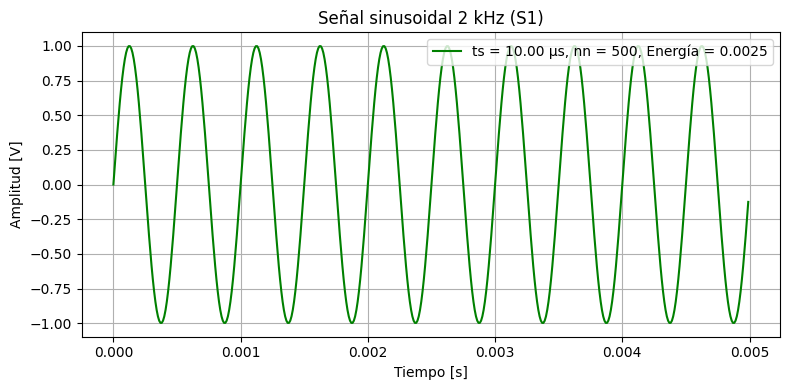

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time
from scipy.io import wavfile

fs = 100000  # Frecuencia de muestreo
ts = 1/fs     # Tiempo entre muestras [s]
nn = 500      # Cantidad de muestras → duración total 5 ms
tt = np.arange(nn)*ts   # Vector de tiempo

# Función para graficar y mostrar ts, nn y energía
def grafico(x, y, titulo):
    E = np.sum(np.abs(y)**2) * ts  # Energía de la señal
    N = len(y)                     # Cantidad de muestras
    Ts = x[1]-x[0]                 # Tiempo entre muestras
    
    plt.figure(figsize=(8,4))
    line_hdls = plt.plot(x, y, 'g', label='Señal')
    plt.title(titulo)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.grid(True)
    
    # Información en la leyenda
    info_text = f"ts = {Ts*1e6:.2f} µs, nn = {N}, Energía = {E:.4f}"
    plt.legend(line_hdls, [info_text], loc='upper right')
    
    plt.tight_layout()
    plt.show()


# Señal 1: sinusoidal 2 kHz
ff_1 = 2000  # Hz
sen_1 = np.sin(2*np.pi*ff_1*tt)
grafico(tt, sen_1, 'Señal sinusoidal 2 kHz (S1)')

La señal de frecuencia `ff_1 = 2000 Hz` tiene un período de   
$$
T = \frac{1}{ff_1} =  \frac{1}{2000 \, \text{Hz}} = 0.0005 \, \text{s} = 0.5 \, \text{ms}
$$

Por lo que en `tt = 5 ms`, se pueden observar  
$$
\frac{5 \, \text{ms}}{0.5 \, \text{ms}} = 10 \, \text{ciclos completos}
$$

Esto es ideal para analizar la señal ya que se tiene un número entero de ciclos, lo que facilita el cálculo de la energía y los posteriores análisis de ortogonalidad y correlación. Se observa, así, que la duración tomada para el vector `tt` es suficiente para mostrar varios ciclos completos de la señal, representándola correctamente, y reduce la cantidad de datos a estudiar.   

Además, cumpliendo con el Teorema de Nyquist-Shannon, la señal está muestrada adecuadamente, dado que la frecuencia de muestreo `fs` es amplimente superior al doble de la frecuencia de la señal `ff_1`. 

La función `grafico` muestra en forma de leyenda en el gráfico el tiempo entre muestras `ts`, la cantidad de muestras tomadas `nn` y la energía de la señal.  

A continuación se generó la misma señal pero amplificada en `amp = 4` y desfasada en `ph = π/2`.

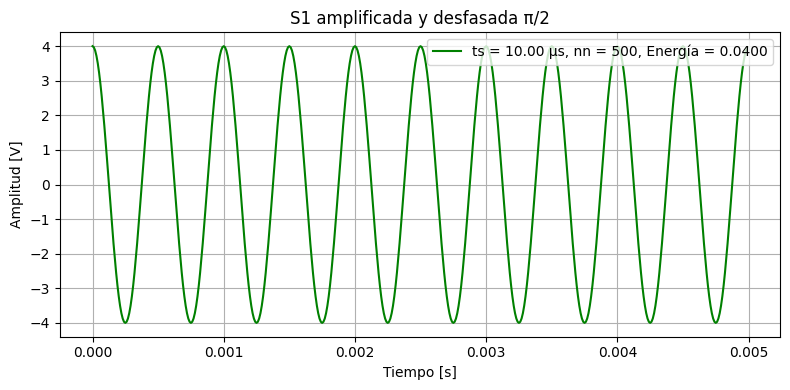

In [5]:
# Señal 2: amplificada y desfasada
sen_2 = 4*np.sin(2*np.pi*ff_1*tt + np.pi/2)
grafico(tt, sen_2, 'S1 amplificada y desfasada π/2')

La señal *S1* se ve amplificada por `4` y desplazada en el tiempo por su fase `π/2` haciendo que comience en un máximo en `tt = 0 s`, en lugar de un cero de la función.  La señal continúa teniendo la misma frecuencia de `2 KHz`, por lo que se pueden observar la misma cantidad de `10` ciclos.  

El tiempo entre muestras y la cantidad de muestras tomadas se mantiene igual, no obstante, la energía de la señal cambia de valor. Esto se debe a que, como se muestra en (2), la energía de una señal en tiempo discreto está relacionada con el cuadrado de la amplitud. Entonces, si la señal *S1* se multiplica por `4`, su energía también se multiplica por ese mismo factor al cuadrado.  

De esta forma, si la energía de *S1* era $E_1 = 0.0025$,  

$$
E_2 = (4^2)* E_1 = 16*0.0025 = 0.0400
$$

Resultado que se observa en el gráfico.

Por otra parte, el desfase no modifica la energía de la señal, únicamente la desplaza en el tiempo.  

Luego, se generó la señal *S1* modulada en amplitud por otra señal sinusoidal de frecuencia `ff_mod = 1000 Hz`.

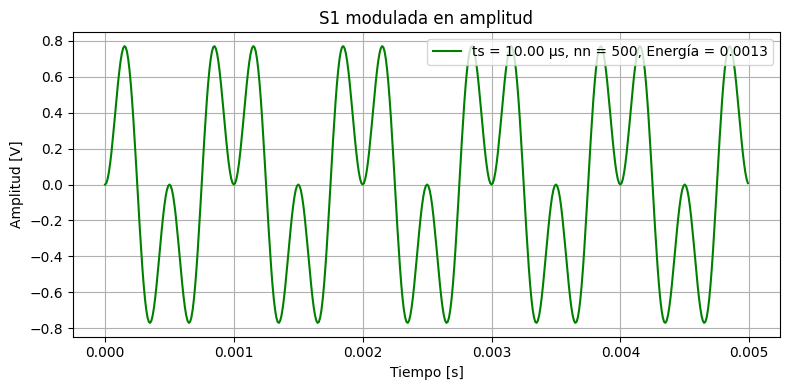

In [3]:
# Señal 3: modulada en amplitud
ff_mod = 1000  # Hz
s_moduladora = np.sin(2*np.pi*ff_mod*tt)
sen_3 = sen_1 * s_moduladora
grafico(tt, sen_3, 'S1 modulada en amplitud')

Al multiplicar *S1*, que recibe el nombre de **señal portadora**, de frecuencia `ff_1 = 2000 Hz` por otra señal sinusoidal de la mitad de la frecuencia (**señal moduladora**), se logra una modulación en amplitud: la amplitud de la señal portadora varía proporcionalmente a la amplitud de la señal moduladora. Si la señal moduladora es cero, la amplitud de la portadora se mantiene constante. Si la señal moduladora tiene una amplitud positiva, la amplitud de la portadora aumenta, y si tiene una amplitud negativa, la amplitud de la portadora disminuye. 